In [1]:
import numpy as np 
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)
bot_or_human = pd.read_pickle('input/features.pkl')
#human = bot_or_human[bot_or_human['outcome'] == 0]
#bot = bot_or_human[bot_or_human['outcome'] == 1]
#data = pd.concat([human,bot])
# del bot_or_human

In [2]:
# nan 处理
for col in ['dt_std2','dt_std1','dt_mean2','dt_min2','country_entropy','dt_mean1','dt_min1']:
    bot_or_human[col].fillna(bot_or_human[col].mean(),inplace = True)
bot_or_human.fillna(0,inplace = True)

In [3]:
# 形状 
bot_or_human.drop(['payment_account', 'address'],1,inplace=True)
bot_or_human[bot_or_human['outcome'] == -1].shape,bot_or_human[bot_or_human['outcome'] == -1].shape

((4700, 36), (4700, 36))

In [4]:
# 描述性统计：
bot_or_human.describe()

,outcome,payment_address_same,bids_count,auctions_count,bids_per_auction_median,countries_count,country_entropy,countries_auction_median,countries_auction_mean,countries_auction_max,...,bids_count_lasthalfh,fraction_lasthalfhour,t_until_end_median,t_since_start_median,dt_min1,dt_std1,dt_mean1,dt_min2,dt_std2,dt_mean2
count,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6.713000e+03,6713.000000,6713.000000,6713.000000,...,6713.000000,6713.000000,6.713000e+03,6.713000e+03,6.713000e+03,6.713000e+03,6.713000e+03,6.713000e+03,6.713000e+03,6.713000e+03
mean,-0.684791,0.140921,1140.523462,56.955311,2.708476,12.536571,2.597766e+03,1.016982,1.126129,4.474602,...,27.214211,0.025080,1.708888e+13,1.487466e+13,2.092067e+10,4.215693e+11,9.352146e+10,1.388488e+12,5.027686e+12,3.488293e+12
std,0.496564,0.347966,9523.031905,130.983566,20.467453,22.436327,2.566219e+04,0.449152,0.516683,10.124861,...,237.590281,0.083005,2.250682e+13,2.075013e+13,9.286519e+11,1.486554e+12,1.107647e+12,7.233538e+12,7.359360e+12,8.390808e+12
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,...,0.000000,0.000000,4.927526e+12,4.800632e+12,0.000000e+00,8.522863e+09,1.789474e+09,5.263158e+07,5.297197e+11,1.115551e+11
50%,-1.000000,0.000000,17.000000,9.000000,1.000000,3.000000,7.832014e+00,1.000000,1.000000,1.000000,...,0.000000,0.000000,7.278579e+12,7.234158e+12,0.000000e+00,6.185816e+10,8.319298e+09,1.789474e+09,3.055916e+12,1.017982e+12
75%,0.000000,0.000000,178.000000,46.000000,2.000000,12.000000,1.762861e+02,1.000000,1.107143,3.000000,...,4.000000,0.022222,1.130003e+13,1.064374e+13,2.631579e+08,4.215693e+11,3.208808e+10,1.388488e+12,5.027686e+12,3.488293e+12
max,1.000000,1.000000,515033.000000,1726.000000,1125.000000,178.000000,1.149485e+06,21.500000,20.083333,167.000000,...,10457.000000,1.000000,7.725932e+13,7.721726e+13,5.706111e+13,4.303742e+13,5.706111e+13,7.610295e+13,5.374142e+13,7.610295e+13


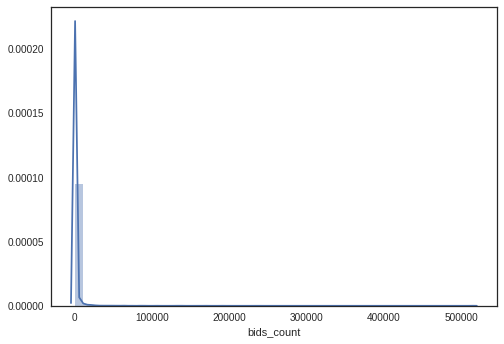

In [16]:
# 数据分布图
sns.distplot(bot_or_human.bids_count)

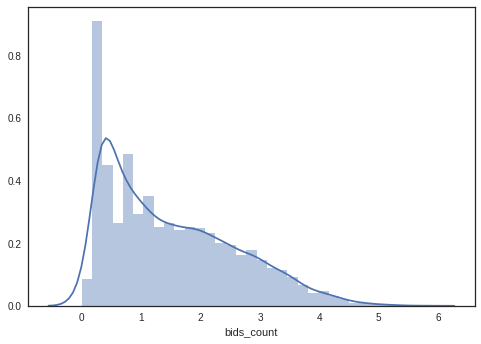

In [5]:
import numpy as np

sns.distplot(np.log10(bot_or_human.bids_count+1))

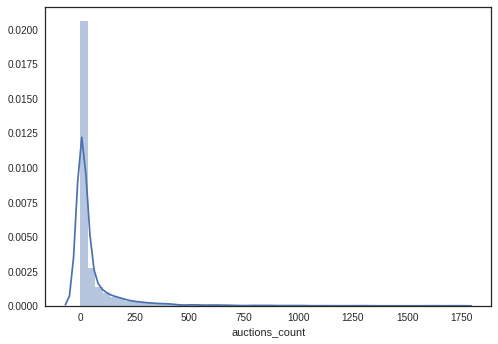

In [9]:
sns.distplot(bot_or_human.auctions_count)

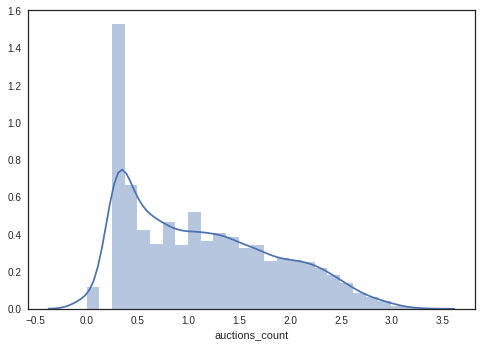

In [11]:
sns.distplot(np.log10(bot_or_human.auctions_count+1))

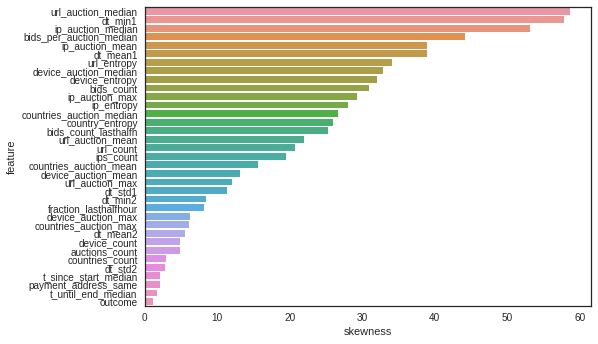

In [21]:
skew = bot_or_human.skew().reset_index().rename(columns = {0:'skewness'}).sort_values('skewness',ascending = False)
skewplot = sns.barplot(y='index',x ='skewness' , data=skew)
skewplot.set(ylabel='feature',xlabel = 'skewness')

In [22]:
# 由于所有特征均为倾斜特征故全部进行log运算
feats = bot_or_human.drop(['outcome','bidder_id'],1).columns.values
bot_or_human[feats] = np.log10(bot_or_human[feats]+1)
# 归一化处理
bot_or_human[feats] = preprocessing.normalize(bot_or_human[feats] , axis=0)

In [20]:
# 保存清洗好的数据
bot_or_human.to_pickle('input/cleaneddata.pkl')

In [23]:
data = bot_or_human[bot_or_human['outcome'] != -1]
del bot_or_human

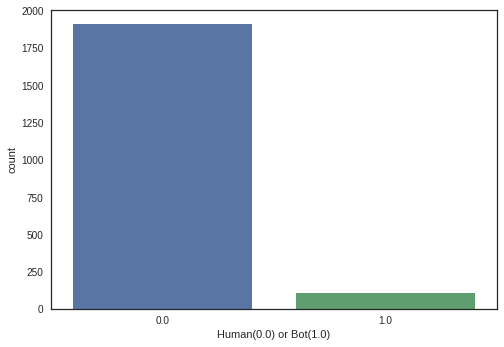

In [24]:
ax = sns.countplot(x='outcome', data=data)
ax.set( xlabel='Human(0.0) or Bot(1.0)')

In [28]:
data[data['outcome'] == 0].shape,data[data['outcome'] == 1].shape

((1910, 36), (103, 36))

In [30]:
# 特征总要性排行
from sklearn.ensemble import ExtraTreesClassifier

X = data.drop(['outcome','bidder_id'],1)
y = data.outcome

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
features = pd.DataFrame()
features['importances'] = importances
features['feature'] = X.columns.values
features = features.sort_values(['importances'],ascending = False)

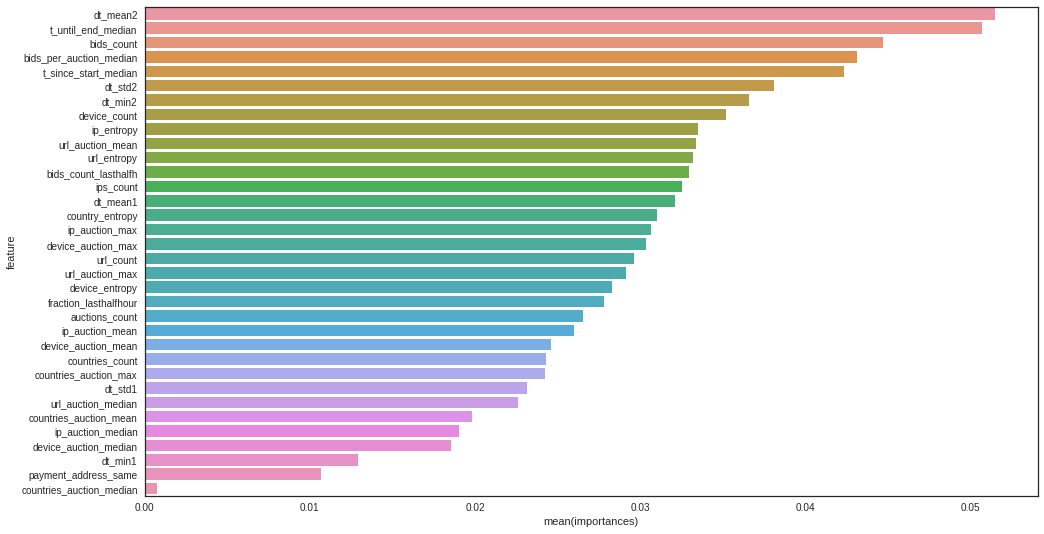

In [34]:

sns.barplot(y='feature',x ='importances' , data=features)

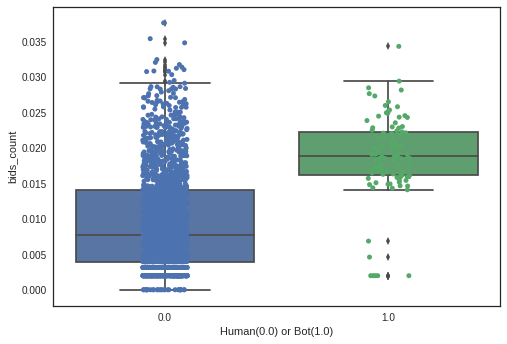

In [25]:
ax = sns.boxplot(x="outcome",y="bids_count",data=data)
ax = sns.stripplot(x="outcome",y="bids_count",data=data,jitter=True)
ax.set( xlabel='Human(0.0) or Bot(1.0)')

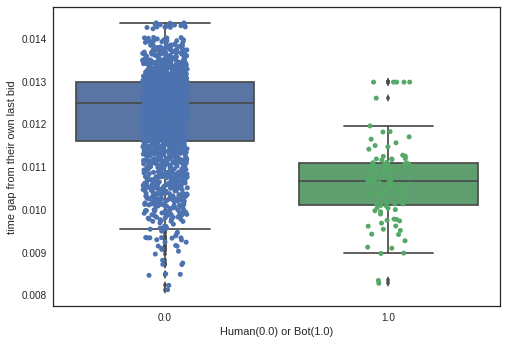

In [26]:
ax = sns.boxplot(x="outcome",y="dt_mean2",data=data)
ax = sns.stripplot(x="outcome",y="dt_mean2",data=data,jitter=True)
ax.set( xlabel='Human(0.0) or Bot(1.0)',ylabel='time gap from their own last bid')

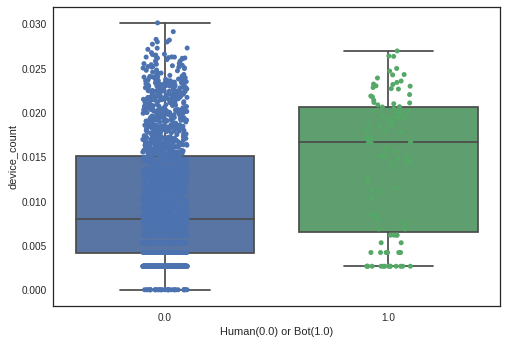

In [27]:
ax = sns.boxplot(x="outcome",y="device_count",data=data)
ax = sns.stripplot(x="outcome",y="device_count",data=data,jitter=True)
ax.set( xlabel='Human(0.0) or Bot(1.0)',ylabel='device_count')

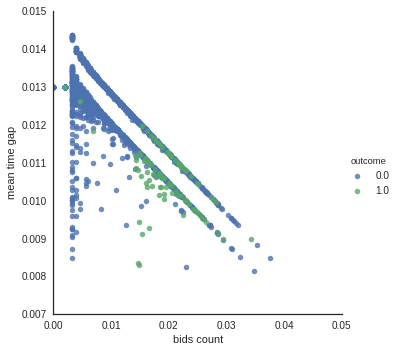

In [41]:
lm = sns.lmplot('bids_count', 'dt_mean2', 
           data=data, 
           fit_reg=False, 
           hue="outcome",  
           scatter_kws={"marker": "D", 
                        "s": 30})
lm.set(xlim=(0, 0.05), ylim=(0.007, 0.015),
      ylabel='mean time gap',xlabel='bids count')
